# ASSIGNMENT 3: Z Transform
## Digital Infinite Impulse Response (IIR) Filter in Python
IIR filters can be represented in Python by writing the numerator and denominator coefficients to arrays.
For example, a simple IIR filter with the transfer function

$H(z)=\frac{b_{0}+b_{1} * z^{-1}+b_{2} * z^{-2}}{a_{0}+a_{1} * z^{-1}+a_{2} * z^{-2}}$

can be written in Python as follows:
```python
b = np.array([b0, b1, b2])
a = np.array([a0, a1, a2])
```
For the following tasks you need a transfer function of an IIR filter. Use the filter $H_1$ if your student number is
odd or $H_2$ if it is even.

$H_{1}(z) = \frac{1-1.618 z^{-1}+z^{-2}}{1-1.516 z^{-1}+0.878 z^{-2}}$

$H_{2}(z) = \frac{0.398 z^{-1}}{1-1.031 z^{-1}+0.353 z^{-2}}$

Start by running the code block below to load the Python packages required to complete this assignment. To run the code, select the code block and push Ctrl+Enter or click the Run button.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from dftools import impz, zplane
%matplotlib inline

**Task 3.1** Calculate the frequency response of the filter using the function *freqz* found in the package `scipy.signal`. Plot the magnitude and phase responses of the filter.

The function *freqz* takes the coefficients of the filter as arguments and returns two values: <b>w</b> and **h** where <b>w</b> contains the points at which the frequency response was calculated and <b>h</b> contains the complex values of the frequency response of the filter corresponding to the frequencies in <b>w</b>.
Examples:
```python
w, h = signal.freqz(b, a)       # A 512 point complex frequency response is assigned to the array h
                                # w contains the frequencies at which h was calculated (fs=2π by default)
w, h = signal.freqz(b, a, n)    # An n point complex frequency response is assigned to the array h
```

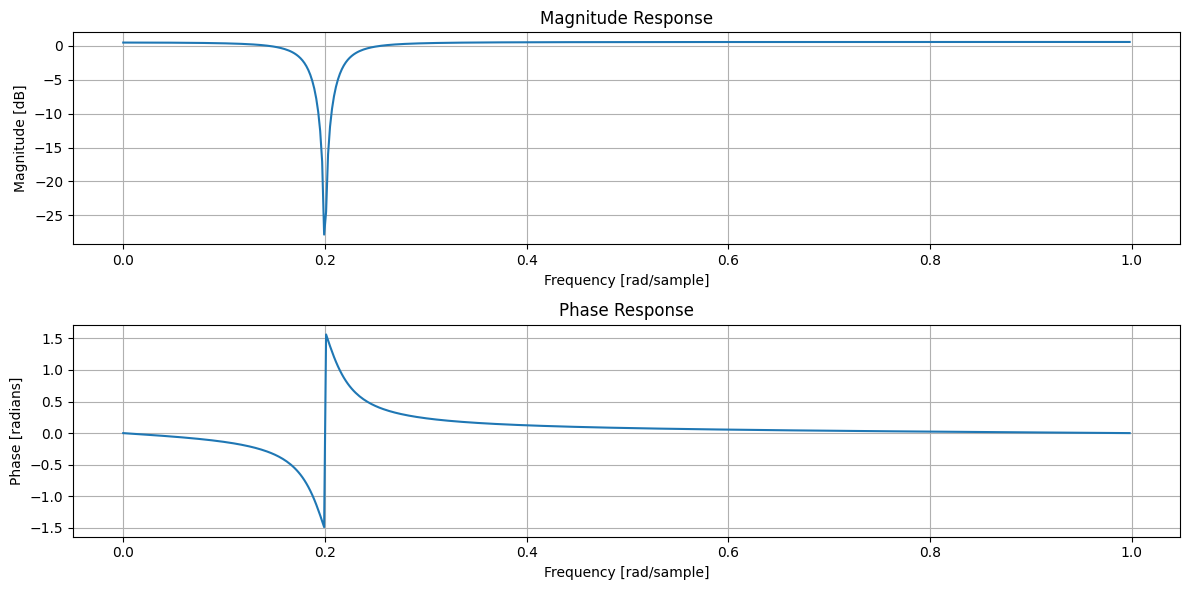

In [2]:
#student no. = 230945, odd
# store the coefficients of the filter in two NumPy arrays
b = np.array([1, -1.618, 1])
a = np.array([1, -1.516, 0.878])

# calculate the frequency response
w, h = signal.freqz(b, a)

# plot the magnitude and phase responses
plt.figure(figsize=(12, 6))

#for magnitude
plt.subplot(2, 1, 1)
plt.plot(w / np.pi, 20 * np.log10(abs(h)))
plt.title('Magnitude Response')
plt.ylabel('Magnitude [dB]')
plt.xlabel('Frequency [rad/sample]')
plt.grid()

#for phase
plt.subplot(2, 1, 2)
plt.plot(w / np.pi, np.angle(h))
plt.title('Phase Response')
plt.ylabel('Phase [radians]')
plt.xlabel('Frequency [rad/sample]')
plt.grid()

plt.tight_layout()


**Look at the magnitude response of your filter. What type of filter is it (low/high pass, band
stop/pass)?**

It is a band stop filter, since it attenuates a narrow band of frequency, while allowing others to pass.

Use the freqz function with the parameter `whole` set to `True` and plot the resulting magnitude and phase responses again.
```python
signal.freqz(b, a, whole=True)
```

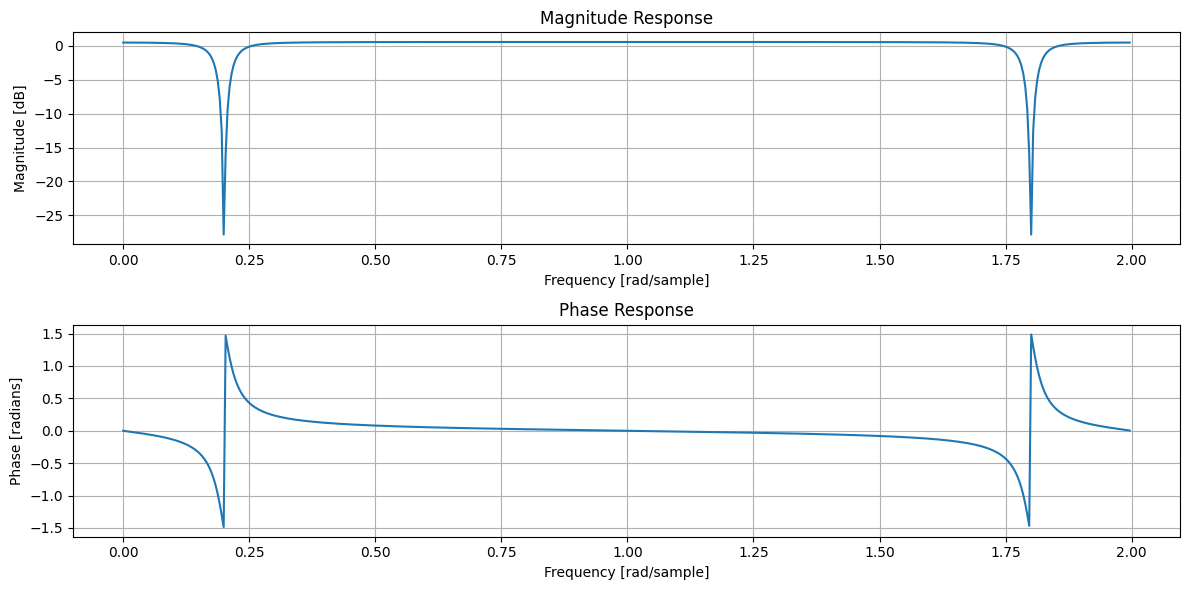

In [3]:
# enter your code here
#student no. = 230945, odd
# store the coefficients of the filter in two NumPy arrays
b = np.array([1, -1.618, 1])
a = np.array([1, -1.516, 0.878])

# calculate the frequency response
w, h = signal.freqz(b, a, whole=True)

# plot the magnitude and phase responses
plt.figure(figsize=(12, 6))

#for magnitude
plt.subplot(2, 1, 1)
plt.plot(w / np.pi, 20 * np.log10(abs(h)))
plt.title('Magnitude Response')
plt.ylabel('Magnitude [dB]')
plt.xlabel('Frequency [rad/sample]')
plt.grid()

#for phase
plt.subplot(2, 1, 2)
plt.plot(w / np.pi, np.angle(h))
plt.title('Phase Response')
plt.ylabel('Phase [radians]')
plt.xlabel('Frequency [rad/sample]')
plt.grid()

plt.tight_layout()


**What is the difference between this plot and the one you drew at the beginning of the task?**

In the previous plot, there’s one sharp phase shift where the signal is blocked, while in this plot, there are two shifts because it blocks two frequencies. This shows how the filter affects different parts of the signal while letting others pass. The two plots show how the filter's phase changes in different frequency ranges.

**Task 3.2** Plot the first 20 samples of the impulse response of your filter. Use the function
impz to calculate the impulse response. This function takes the same first three parameters as the freqz function. You can see the details of this function in the file dftools.py provided with this assignment.

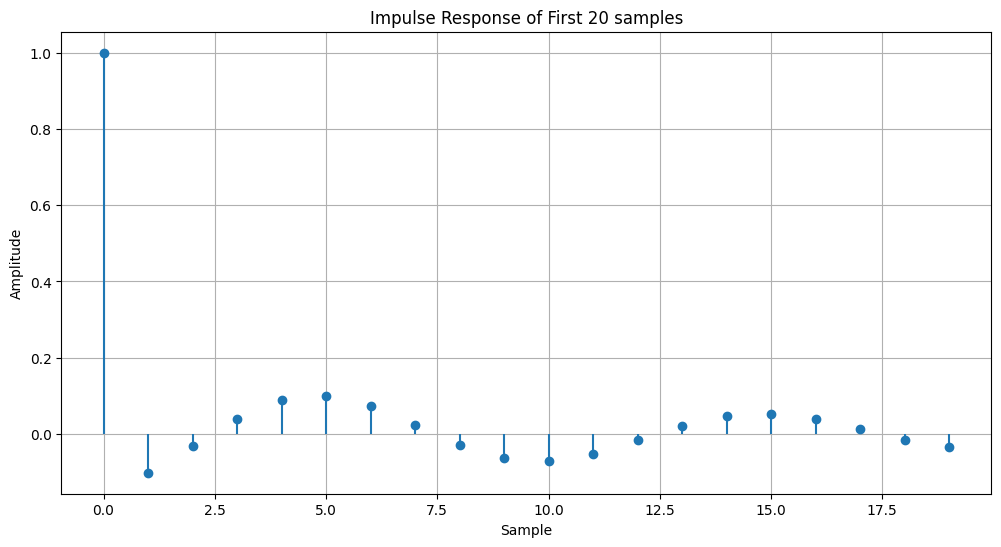

In [4]:
# calculate and plot the impulse response
from dftools import impz

b = np.array([1, -1.618, 1])
a = np.array([1, -1.516, 0.878])

# Calculate the impulse response
N = 20  # Number of samples
impulse_response = impz(b, a, N)

# Plot the impulse response
plt.figure(figsize=(12, 6))
plt.stem(impulse_response, basefmt=" ")
plt.title('Impulse Response of First 20 samples')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


**Task 3.3** Draw the zero-pole plot of your filter using the function *zplane*. This function also
works with the same parameters as the freqz function, with the exception that there is no need
for the length parameter n. You can see the details of this function in the file dftools.py provided with this assignment.

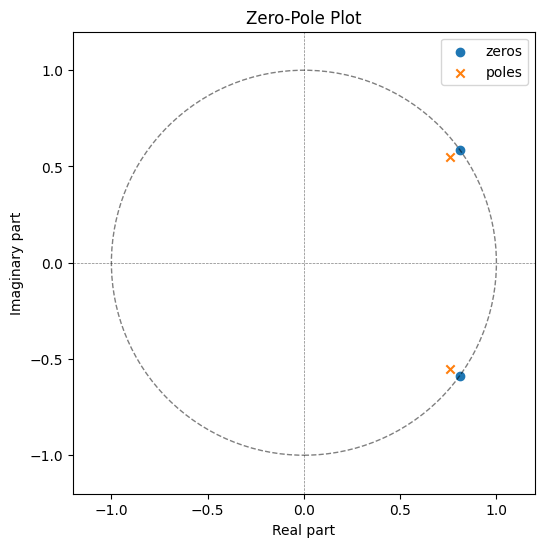

In [5]:
# plot the zeros and poles of the filter
from dftools import zplane

b = np.array([1, -1.618, 1])
a = np.array([1, -1.516, 0.878])

# Draw the zero-pole plot
zplane(b, a)
plt.title('Zero-Pole Plot')
plt.show()

### Instructions for submission
1. Make sure that your code produces the desired results from scratch by selecting Kernel -> Restart & Run all. This will clear the output of your code and run all the code cells again from top to bottom.

2. Rename this notebook to `DF_Assignment3_firstname_lastname_studentnumber.ipynb`.

3. Submit only the resulting notebook (.ipynb file) to the return box in Moodle. Send your submission before the deadline to receive additional week exam points.